In [73]:
#https://github.com/ofajardo/pyreadr
#!pip install pyreadr
#!pip install -U pip setuptools
#!pip install feather-format

import random
import pyreadr
import os
import pandas as pd
import numpy as np 
import feather
import decimal

In [59]:
#download experimental data; 
#original source: Kosuke Imai; Michael Lingzhi Li, 2021, "Replication Data for: Experimental Evaluation of Individualized Treatment Rules", https://doi.org/10.7910/DVN/YCYTOB, Harvard Dataverse, V1

'''
* `Z`: A binary treatment (PSA provision)
* `D`: An ordinal decision (judge's release decision)
* `Y`: An outcome (FTA)
* Pre-treatment covariates: `Sex`, `White`, `SexWhite`, `Age`, `NCorNonViolentMisdemeanorCharge`, `ViolentMisdemeanorCharge`, `NonViolentFelonyCharge`, `ViolentFelonyCharge`, `PendingChargeAtTimeOfOffense`, `PriorMisdemeanorConviction`, `PriorFelonyConviction`, `PriorViolentConviction`, `PriorSentenceToIncarceration`, `PriorFTAInPastTwoYears`, `PriorFTAOlderThanTwoYears`, and `Staff_ReleaseRecommendation`.

See the table below for the details of the pre-treatment covariates:

| Variables | Description |
|:---------|:---------|
|`Sex`|male (1) or female (0)|
|`White`|white (1)or non-white (0)|
|`SexWhite`|the interaction between `Sex` and `White`|
|`Age`|age|
|`NCorNonViolentMisdemeanorCharge`| binary variable for current NC (parole violations) or non-violent misdemeanor charge|
|`ViolentMisdemeanorCharge`| binary variable for current violent misdemeanor charge|
|`NonViolentFelonyCharge`| binary variable for current non-violent felony charge|
|`ViolentFelonyCharge`| binary variable for current violent felony charge|
|`PendingChargeAtTimeOfOffense`|binary variable for pending charge (felony, misdemeanor, or both) at the time of offense|
|`PriorMisdemeanorConviction`|binary variable for prior conviction of misdemeanor|
|`PriorFelonyConviction`|binary variable for prior conviction of felony|
|`PriorViolentConviction`|four-level ordinal variable for prior violent conviction ($0,1,2$ and $3$, where $3$ indicates the counts of three or more)|
|`PriorSentenceToIncarceration`|binary variable for prior sentence to incarceration|
|`PriorFTAInPastTwoYears`|three-level ordinal variable for FTAs from past two years ($0,1$ and $2$ where $2$ indicates the counts of two or more)|
|`PriorFTAOlderThanTwoYears`|binary variable for FTAs from over two years ago|
|`Staff_ReleaseRecommendation`|four-level ordinal variable for the DMF recommendation|

'''
data_folder = "aihuman/data"
tot_res = list()

for filename in os.listdir(data_folder):
    f = data_folder+"/"+filename
    if ".rda" in f:
        result =pyreadr.read_r(f)
        tot_res.append(result) 

df_list = list()
ref_dict = dict()

for item in tot_res:
    for k, v in item.items():
        # print key and value
        ref_dict[k] = v



In [60]:
#turn data files into a single dataframe summarizing results

#ref_dict.keys() #index of each data file in data folder
ref_dict['NCAdata'] = ref_dict['NCAdata'].rename(columns={"Y": "Y_NCA"})
ref_dict['NVCAdata'] = ref_dict['NVCAdata'].rename(columns={"Y": "Y_NVCA"})
ref_dict['FTAdata'] = ref_dict['FTAdata'].rename(columns={"Y": "Y_FTA"})

res_df = pd.concat([ref_dict['PSAdata'],ref_dict['NCAdata']], axis = 1)
res_df["Y_NVCA"] = ref_dict['NVCAdata']["Y_NVCA"]
res_df["Y_FTA"] = ref_dict['FTAdata']["Y_FTA"]
res_df["Hearing Date"] = ref_dict['HearingDate']
res_df = res_df.loc[:,~res_df.columns.duplicated()].copy()
res_df.to_csv("exp_summary.csv")

#res_df["Hearing Date"].nunique() -- Note: Experimental results for 274 dates ; 1891 cases 

In [61]:
res_df_exp_data = pd.read_csv("exp_summary.csv") #-- access results for dataframe
res_df_exp_data

,Unnamed: 0,Z,D,FTAScore,NCAScore,NVCAFlag,DMF,Sex,White,SexWhite,...,PriorFelonyConviction,PriorViolentConviction,PriorSentenceToIncarceration,PriorFTAInPastTwoYears,PriorFTAOlderThanTwoYears,Staff_ReleaseRecommendation,Y_NCA,Y_NVCA,Y_FTA,Hearing Date
0,0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2
1,1,1.0,1.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,2
2,2,1.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,4
3,3,1.0,0.0,5.0,4.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,1.0,1
4,4,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1886,0.0,0.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,261
1887,1887,0.0,2.0,6.0,6.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,6.0,0.0,0.0,0.0,270
1888,1888,0.0,0.0,5.0,5.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,251
1889,1889,1.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,271


In [62]:
def run_trial(t, J_dist, res_df): 
    '''
    J_dist -- percentage of treated cases assigned to each judge; accomodates any variable number of judges
    res_df -- dataframe of experiment data with unassigned judge column 
    '''
    res_df = res_df.copy()
    #add an empty judge column 
    res_df["J"] = np.nan #judge assignment 
    res_df["T"] = np.nan #trial number 

    #re-set indices 
    num = len(res_df.index)
    div = len(J_dist.keys())
    k = [num // div + (1 if x < num % div else 0)  for x in range (div)]
    J_idx = dict()
    selected = list()

    curr = 0
    for j in J_dist.keys():
    
        p1 = J_dist[j]  
        p2 = 1.0 - J_dist[j] 

        pop1 = res_df.index[res_df['Z'] == 1.0].tolist()
        w1 = len(pop1)*[p1]
        pop2 = res_df.index[res_df['Z'] == 0.0].tolist()
        w2 = len(pop2)*[p2]

        pop = pop1+pop2
        w = w1+w2
    
        pop_dict = dict(zip(pop, w))
        pop_unselected = [x for x in pop if x not in selected]
    
        pop_dict = dict((i, pop_dict[i]) for i in pop_unselected if i in pop_dict)
        w = np.array(list(pop_dict.values()))
        w_final = w/w.sum()

        J_idx[j] = list(np.random.choice(list(pop_dict.keys()),k[curr],replace=False, p=w_final))
    
        curr+= 1
        
        selected += J_idx[j]
        for i in J_idx[j]:
            res_df.at[i, "J"]= j
            res_df.at[i, "T"]= t

    return res_df

In [63]:
def normalize_outcomes(df):
    '''
    Staff_ReleaseRecommendation -- four-level ordinal variable for the DMF recommendation
    DMF -- binary decision
    
    Any of the negative outcomes (NCA, NVCA, FTA) counts as a negative outcome overall. 
    Any decision beyond release (D = 0) is counted as a decision/ action towards detainment (D = 1). 
    A decision is correct when the action (eg. release, D = 0) matches the actual outcome (eg. Y = 0). 

    Get final decisions and outcomes into binary format. 
    
    '''
    df = df.copy()
    TP=0
    TN=0
    FP=0
    FN=0
    D_norm_list = list()
    Y_list = list()
    D_corr_def_list = list()

    for index, row in df.iterrows():
        if row["Y_NCA"]== 1.0 or row["Y_NVCA"]== 1.0 or row["Y_FTA"]== 1.0:
            Y=1.0
        else:
            Y=0.0
        
        if Y==1.0 and row["DMF"]== 1.0:
            TP+=1
        if Y==0.0 and row["DMF"]== 0.0:
            TN+=1
        if Y==1.0 and row["DMF"]== 0.0:
            FN+=1
        if Y==0.0 and row["DMF"]== 1.0:
            FP+=1

        if row["D"] > 0:
            D_norm = 1.0
        elif row["D"] == 0:
            D_norm = 0.0

        if D_norm == 1:
            D_corr = "U" #detained defendents cannot be reliably observed
        elif D_norm == Y:
            D_corr = 1.0 #if released and did not recidivate or commit a crime 
        else:
            D_corr = 0.0 #if released and did recidivate or commit a crime

        Y_list.append(Y)
        D_norm_list.append(D_norm)
        D_corr_def_list.append(D_corr)
        
    #set a normalized outcome 
    df["Y"] = Y_list
    df["D_norm"] = D_norm_list

    #identify default correct decisions  
    df["D_corr_def"] = D_corr_def_list

    return df 


def calc_acc(df, DMF_id):
    '''
    Calculate the accuracy of a given predictive recommendation with respect to downstream outcomes. 
    
    '''
    df = df.copy()
    TP=0
    TN=0
    FP=0
    FN=0
    D_norm_list = list()
    Y_list = list()
    D_corr_def_list = list()

    for index, row in df.iterrows():
        Y = row["Y"]
        if Y==1.0 and row[DMF_id]== 1.0:
            TP+=1
        if Y==0.0 and row[DMF_id]== 0.0:
            TN+=1
        if Y==1.0 and row[DMF_id]== 0.0:
            FN+=1
        if Y==0.0 and row[DMF_id]== 1.0:
            FP+=1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy
    
#Original exp data results: Model accruacy -- (0.5367530407191962)

In [64]:
def f1_decision_sim(res_df, J_dist, b_k=0.1, thres=0.6, linear = True, exp_idx = "D_exp1"):
    '''
    Running simulation for treatment exposure model. 

    Note that the manipulatable experiment design choice is treatment assignment. 
    '''
    
    res_df = res_df.copy()
    exp = dict()
    for k in list(J_dist.keys()):
        if k:
            exp[k] = [0, 0]


    D_list = list()
    a = 1-b_k

    J_ik=0

    for index, row in res_df.iterrows():
    #going through all the cases

        #set default decision
        def_ik = row["D_norm"]
        rec_ik = row["DMF"]

        judge_name = row["J"]  # the judge for this case
        judge_cases_seen = exp[judge_name][1]
        judge_num_treated = exp[judge_name][0]

        if judge_cases_seen == 0:
            J_ik = b_k
        else:
            if linear:
                J_ik = b_k + a*(judge_num_treated/judge_cases_seen)  ## linear J_ik model 
            else:
                # avg exposure to PSA is above threshold
                if (judge_num_treated/judge_cases_seen)  > thres:
                    J_ik = 1 
                else:
                    #not above threshold 
                    J_ik = 0 #b_k + 0


        e_ik = np.random.binomial(1, p=J_ik)

        if row["Z"] == 0 :
            D_list.append(def_ik)
            exp[judge_name][1] += 1

        else:
            exp[judge_name][0] += 1
            exp[judge_name][1] += 1
            if e_ik == 1:
                D_list.append(rec_ik)
            elif e_ik == 0:
                D_list.append(def_ik)

    res_df[exp_idx] = D_list
    
    return res_df , exp_idx

In [65]:
def f2_decision_sim(res_df, J_dist, b_k=0.1, pred_thres=5, cap_thres=0.5, linear=True, exp_idx = "D_exp2"):
    '''
    Running simulation for capacity constraint model. 

    Note that the manipulatable experiment design choice is setting the model recommendation threshold 
    to control the model's positive predictive rate. 
    '''

    res_df = res_df.copy()

    #look at alternative recommendation with different positive predictions 
    res_df["DMF_alt_cc"] = np.where(res_df["Staff_ReleaseRecommendation"] > pred_thres, 1.0, 0.0) 
    #Note: higher threshold for less positive recommendation
    
    exp = dict()
    for k in list(J_dist.keys()):
        if k:
            exp[k] = [0, 0, 0]


    D_list = list()
    a = 1-b_k

    J_ik=0

    for index, row in res_df.iterrows():
    #going through all the cases

        #set default decision
        def_ik = row["D_norm"]
        rec_ik = row["DMF_alt_cc"]


        judge_name = row["J"]  # the judge for this case
        pos_num = exp[judge_name][2] #num positive cases each judge has seen 
        judge_cases_seen = exp[judge_name][1]
        judge_num_treated = exp[judge_name][0]
        
        if pos_num == 0:
            J_ik = b_k
        else:
            if linear:
                J_ik = b_k + a*(pos_num/judge_cases_seen)  ## linear J_ik
            else:
                # rate of exposure to positive cases is above threshold
                if (pos_num/judge_cases_seen)  > cap_thres:
                    J_ik = 1 
                else:
                    #not above thres
                    J_ik = 0 


        e_ik = np.random.binomial(1, p=J_ik)

        if row["Z"] == 0 :
            D_list.append(def_ik)
            exp[judge_name][1] += 1

        else:
            exp[judge_name][0] += 1
            exp[judge_name][1] += 1
            if rec_ik > 0:
                exp[judge_name][2] += 1
                
            if e_ik == 1:
                D_list.append(rec_ik)
            elif e_ik == 0:
                D_list.append(def_ik)

    res_df[exp_idx] = D_list
    
    return res_df , exp_idx

In [66]:
def generate_alt_DMF_acc(res_df, acc_boost=0.5):
    '''
    Generating alternative model recommendations, based on an accuracy boost from the default. 

    Note: acc_boost at 1 is going to give perfectly accurate recommendations; acc_boost at 0 won't change anything from default DMF model 

    Note that a decision is considered correct when the action (eg. release, D = 0) matches the actual outcome (eg. Y = 0), 
    so we boost accuracy by assigning the correct recommendation to a random subset of incorrect default decisions. 
    '''    
    
    res_df = res_df.copy()
    rdf = normalize_outcomes(res_df)
    DMF_acc = calc_acc(rdf, "DMF")

    DMF_alt_acc = list()
    for index, row in rdf.iterrows():
        flip_score = np.random.binomial(1, p=acc_boost)
        if row["DMF"] != row["Y"]:
            if flip_score:
                DMF_alt_acc.append(row["Y"])
            else:
                DMF_alt_acc.append(row["DMF"])
        else:
            DMF_alt_acc.append(row["DMF"])
 

    rdf["DMF_alt_acc"] = DMF_alt_acc
    DMF_alt_acc = calc_acc(rdf, "DMF_alt_acc")


    return rdf, DMF_acc, DMF_alt_acc

In [72]:
def f3_decision_sim(res_df, J_dist, b_k=0.1, acc_boost=0.5, thres=0.5, linear=True, exp_idx = "D_exp3"):
    '''
    Running simulation for low trust model. 

    Note that the manipulatable experiment design choice is model recommendation accuracy.
    '''    

    res_df = res_df.copy()
    res_df, DMF_acc, DMF_alt_acc = generate_alt_DMF_acc(res_df, acc_boost)
    
    exp = dict()
    for k in list(J_dist.keys()):
        if k:
            exp[k] = [0, 0, 0]


    D_list = list()
    a = 1-b_k

    J_ik=0


    for index, row in res_df.iterrows():
    #going through all the cases

        #set default decision
        def_ik = row["D_norm"]
        rec_ik = row["DMF_alt_acc"]


        judge_name = row["J"]  # the judge for this case
        incorr_num = exp[judge_name][2] #num incorrect predictions each judge has seen 
        judge_cases_seen = exp[judge_name][1]
        judge_num_treated = exp[judge_name][0]
        

        if incorr_num == 0:
            J_ik = b_k
        else:
            if linear:
                J_ik = b_k + a*(incorr_num/judge_cases_seen)  # linear 
            else:
                if (incorr_num/judge_cases_seen)  < thres:
                    #avg exposure to incorrect recommendation is above threshold
                    J_ik = 1 #non-linear
                else:
                    #not above thres
                    J_ik = 0 
            

        e_ik = np.random.binomial(1, p=J_ik)

        if rec_ik != row["Y"]:
            wrong = True
        else:
            wrong = False 

        if row["Z"] == 0 :
            D_list.append(def_ik)
            exp[judge_name][1] += 1

        else:
            exp[judge_name][0] += 1
            exp[judge_name][1] += 1
            if wrong:
                exp[judge_name][2] += 1
                
            if e_ik == 1:
                D_list.append(rec_ik)
            elif e_ik == 0:
                D_list.append(def_ik)

    res_df[exp_idx] = D_list
    
    
    return res_df, exp_idx

In [68]:
def calc_corr_decisions(df, D_label):
    '''
    Identify correct decisions. 

    Note that a decision is considered correct when the action (eg. release, D = 0) matches the actual outcome (eg. Y = 0). 
    '''
    df = df.copy() 
    D_corr_list = list()

    for index, row in df.iterrows():
        if row[D_label] == 1:
            D_corr = "U" #detained defendents cannot be reliably observed
        elif row["Y"] == row[D_label]:
            D_corr = 1.0 #if released and did not recidivate or commit a crime 
        else:
            D_corr = 0.0 #if released and did recidivate or commit a crime 

        D_corr_list.append(D_corr)

    #identify correct decisions  
    df["D_corr"] = D_corr_list

    return df 

In [74]:
##Experiment 1 

#Run 1000 trials of simulation for each scenario and bsave to a csv

n_trials = 1000
J_scenarios = [{"J1": 0.6, "J2": 0.1, "J3": 0.3}, {"J1": 0.333, "J2": 0.333, "J3": 0.333}, {"J1": 0.5, "J2": 0.5}, {"J1": 0.999999999, "J2": 0.0000001}]

for J_dist in J_scenarios:
    all_res = list()
    scenario_name = str()
    
    for v in J_dist.values():
        scenario_name = scenario_name+"_"+str(v)
     
    
    for i in range (1, n_trials+1):
        t_res = run_trial(i, J_dist, res_df_exp_data)
        all_res.append(t_res)

    exp_df = pd.concat(all_res)
    exp_df = normalize_outcomes(exp_df)
    
    exp_df, exp_idx = f1_decision_sim(exp_df, J_dist, 0.1, 0.5, True) #linear 
    exp_df = calc_corr_decisions(exp_df, exp_idx)
    
    exp_df.to_csv(exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_"+str(i)+".csv")

    exp_df, exp_idx = f1_decision_sim(exp_df, J_dist, 0.1, 0.5, False) #non-linear 
    exp_df = calc_corr_decisions(exp_df, exp_idx)
    
    exp_df.to_csv(exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_"+str(i)+"_non_linear.csv")

/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

In [80]:
## Experiment 2 

#Run 1000 trials of simulation for each treatment assignment scenario; and each threshold level then save to a csv

n_trials = 1000
J_scenarios = [{"J1": 0.6, "J2": 0.1, "J3": 0.3}, {"J1": 0.333, "J2": 0.333, "J3": 0.333}, {"J1": 0.5, "J2": 0.5}, {"J1": 0.999999999, "J2": 0.0000001}]

for J_dist in J_scenarios:
    all_res = list()
    scenario_name = str()
    
    for v in J_dist.values():
        scenario_name = scenario_name+"_"+str(v)
     
    
    for i in range (1, n_trials+1):
        t_res = run_trial(i, J_dist, res_df_exp_data)
        all_res.append(t_res)

    exp_df = pd.concat(all_res)
    exp_df = normalize_outcomes(exp_df)
    
    for i in range(3,7):
        print(i, J_dist)
        exp_df, exp_idx = f2_decision_sim(exp_df, J_dist, 0.1, i, 0.5, True, "D_exp2") #linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        exp_df.to_csv(exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_"+str(i)+".csv")
        
        exp_df, exp_idx = f2_decision_sim(exp_df, J_dist, 0.1, i, 0.5, False, "D_exp2") #linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        exp_df.to_csv(exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_"+str(i)+"_non_linear.csv")

/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

3 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
4 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
5 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
6 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}


/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

3 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
4 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
5 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
6 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}


/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

3 {'J1': 0.5, 'J2': 0.5}
4 {'J1': 0.5, 'J2': 0.5}
5 {'J1': 0.5, 'J2': 0.5}
6 {'J1': 0.5, 'J2': 0.5}


/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

3 {'J1': 0.999999999, 'J2': 1e-07}
4 {'J1': 0.999999999, 'J2': 1e-07}
5 {'J1': 0.999999999, 'J2': 1e-07}
6 {'J1': 0.999999999, 'J2': 1e-07}


In [ ]:
## Experiment 3 

#Run 1000 trials of simulation for each scenario; and each accuracy boost level then save to a csv

n_trials = 1000
J_scenarios = [{"J1": 0.6, "J2": 0.1, "J3": 0.3}, {"J1": 0.333, "J2": 0.333, "J3": 0.333}, {"J1": 0.5, "J2": 0.5}, {"J1": 0.999999999, "J2": 0.0000001}]

for J_dist in J_scenarios:
    all_res = list()
    scenario_name = str()
    
    for v in J_dist.values():
        scenario_name = scenario_name+"_"+str(v)
     
    #assign treatment 
    for i in range (1, n_trials+1):
        t_res = run_trial(i, J_dist, res_df_exp_data)
        all_res.append(t_res)

    exp_df = pd.concat(all_res)
    exp_df = normalize_outcomes(exp_df)
    
    for i in np.arange(0, 1.1, 0.1):
        i = round(i,1)
        print(i, J_dist)
        exp_df, exp_idx = f3_decision_sim(exp_df, J_dist, 0.1, i, 0.5, True, "D_exp3") #linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        exp_df.to_csv(exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_"+str(i)+".csv")

        exp_df, exp_idx = f3_decision_sim(exp_df, J_dist, 0.1, i, 0.5, False, "D_exp3") #non-linear
        exp_df = calc_corr_decisions(exp_df, exp_idx)
        exp_df.to_csv(exp_idx+"_summary"+scenario_name+"_t"+str(n_trials)+"_"+str(i)+"_non_linear.csv")
    

/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

0.0 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.1 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.2 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.3 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.4 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.5 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.6 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.7 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.8 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
0.9 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}
1.0 {'J1': 0.6, 'J2': 0.1, 'J3': 0.3}


/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

0.0 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.1 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.2 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.3 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.4 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.5 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.6 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.7 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.8 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
0.9 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}
1.0 {'J1': 0.333, 'J2': 0.333, 'J3': 0.333}


/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/2xnc13kx64j0nynmy8zwv2680000gn/T/ipykernel_37060/3012662538.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'J1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_df.at[i, "J"]= j
/var/folders/n5/

0.0 {'J1': 0.5, 'J2': 0.5}
0.1 {'J1': 0.5, 'J2': 0.5}
0.2 {'J1': 0.5, 'J2': 0.5}
0.3 {'J1': 0.5, 'J2': 0.5}


M
F
W
NW
WM
NWM
WF
NWF
(3.30832655821871e-06, array([[410000, 411000],
       [538000, 532000]]))
(0.0003357315708249662, array([[130000, 132000],
       [705000, 705000]]))
(1.3827307116171701e-293, array([[380244, 374000],
       [296927, 331000]]))
M
F
W
NW
WM
NWM
WF
NWF
(3.30832655821871e-06, array([[410000, 411000],
       [538000, 532000]]))
(0.0003357315708249662, array([[130000, 132000],
       [705000, 705000]]))
(6.87069552256603e-285, array([[393698, 374000],
       [308361, 331000]]))
M
F
W
NW
WM
NWM
WF
NWF
(3.30832655821871e-06, array([[410000, 411000],
       [538000, 532000]]))
(0.0003357315708249662, array([[130000, 132000],
       [705000, 705000]]))
(1.4215115113902818e-238, array([[396940, 374000],
       [314291, 331000]]))
M
F
W
NW
WM
NWM
WF
NWF
(3.30832655821871e-06, array([[410000, 411000],
       [538000, 532000]]))
(0.0003357315708249662, array([[130000, 132000],
       [705000, 705000]]))
(6.368040254429457e-231, array([[406619, 374000],
       [322762, 331000

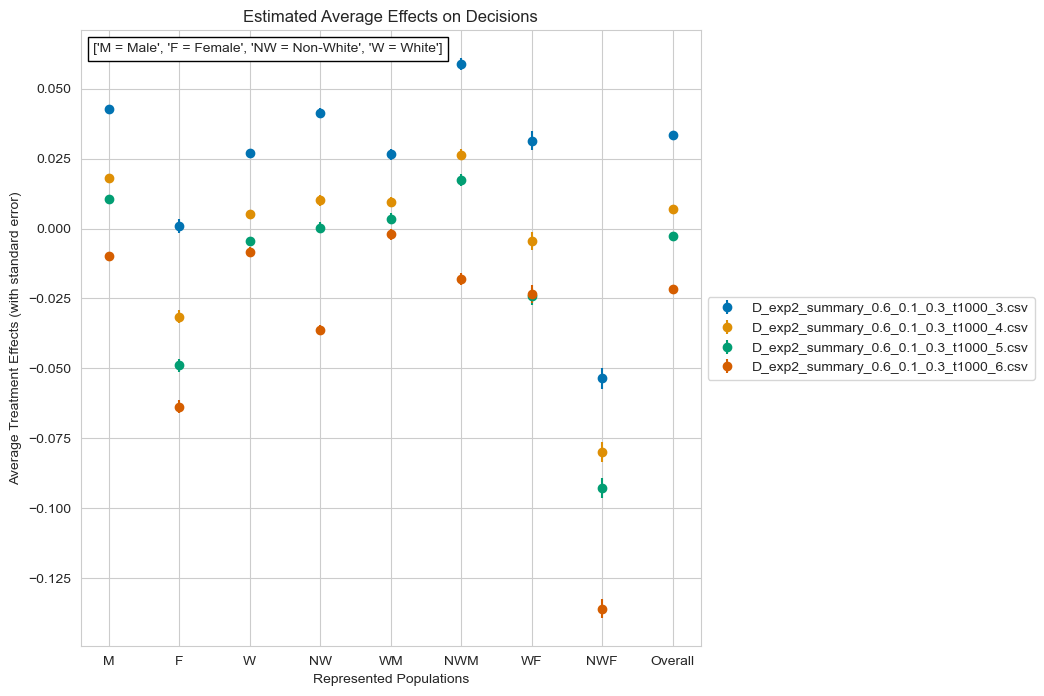

In [46]:
#plot out the change in average treatment effect on decisions and outcomes 
from matplotlib.offsetbox import AnchoredText
from scipy.stats import chi2_contingency

from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")

%matplotlib inline

#import datagenerators as dg

def stat_test(ds, val):
    '''
    Calculate p-value of treatment effect. 
    
    '''
    ds = ds.copy()

    if val == "corr_d":
     ds = ds[ds["D_corr"] != "U"]
    
    base = ds[ds["Z"] == 0]
    variant = ds[ds["Z"] == 1]
    
    if val == "y":
     ctrl_y = base[base["Y"]==1]
     ctrl_noty = base[base["Y"]==0]
     treat_y = variant[variant["Y"]==1]
     treat_noty = variant[variant["Y"]==0]

    if val == "d":
     ctrl_y = base[base["D"]==1]
     ctrl_noty = base[base["D"]==0]
     treat_y = variant[variant["D"]==1]
     treat_noty = variant[variant["D"]==0] 

    if val == "corr_d":
     ctrl_y = base[base["D_corr"]=="1.0"]
     ctrl_noty = base[base["D_corr"]=="0.0"]
     treat_y = variant[variant["D_corr"]=="1.0"]
     treat_noty = variant[variant["D_corr"]=="0.0"]   

    ty = treat_y.shape[0]
    cy = ctrl_y.shape[0]
    t_not = treat_noty.shape[0]
    c_not =ctrl_noty.shape[0]
    
    obs = np.array([[ty, cy], [t_not, c_not]])

    _, p, _, _ = chi2_contingency(obs, lambda_="log-likelihood")

    return p, obs

def estimate_uplift_y(ds):
    """
    Estiamte the difference in means between two groups.
 
    "estimated_effect" - the difference in mean values of $y$ for treated and untreated samples.
    "standard_error" - 90% confidence intervals arround "estimated_effect"
        
        
    """
    ds = ds.copy()
    base = ds[ds["Z"] == 0]
    variant = ds[ds["Z"] == 1]
    
    delta = variant["Y"].mean() - base["Y"].mean()
    delta_err = 1.96 * np.sqrt(
        variant["Y"].var() / variant.shape[0] + 
        base["Y"].var() / base.shape[0])
    
    return delta,delta_err #{"estimated_effect_y_overall": delta, "standard_error_y_overall": delta_err}

def estimate_uplift_d(ds, D_ref):
    """
    Estiamte the difference in means between two groups.
    
    "estimated_effect" - the difference in mean values of $y$ for treated and untreated samples.
    "standard_error" - 90% confidence intervals around "estimated_effect" 
        
    """
    ds = ds.copy()
    base = ds[ds["Z"] == 0]
    variant = ds[ds["Z"] == 1]
    
    delta = variant[D_ref].mean() - base[D_ref].mean()
    delta_err = 1.96 * np.sqrt(
        variant[D_ref].var() / variant.shape[0] + 
        base[D_ref].var() / base.shape[0])
    
    return delta,delta_err #{"estimated_effect_d_overall": delta, "standard_error_d_overall": delta_err}

def estimate_uplift_dcorrect(ds):
    """
    Estimate the difference in means between two groups.

    "estimated_effect" - the difference in mean values of $y$ for treated and untreated samples.
    "standard_error" - 90% confidence intervals around "estimated_effect"
        
    """
    ds = ds.copy()
    
    ds = ds[ds["D_corr"] != "U"] #Remove examples we don't know the correctness of the outcome for 
    
    base = ds[ds["Z"] == 0]
    variant = ds[ds["Z"] == 1]
    
    delta = variant["D_corr"].astype("float").mean() - base["D_corr"].astype("float").mean()
    delta_err = 1.96 * np.sqrt(
        variant["D_corr"].astype("float").var() / variant.shape[0] + 
        base["D_corr"].astype("float").var() / base.shape[0])
    
    return delta,delta_err #{"estimated_effect_dcorr_overall": delta, "standard_error_dcorr_overall": delta_err}

#Note -- break this down by demographic [M, F, W, NW, WM, NWM, WF, NWF]

def demo_est(ds, D_ref):
    '''
    Break down average treatment effect by demographic [M, F, W, NW, WM, NWM, WF, NWF]
    '''
    
    demo = {"M":{"Sex":[1], "White": [0,1]}, "F":{"Sex":[0], "White": [0,1]}, "W":{"Sex":[0,1], "White": [1]}, "NW":{"Sex":[0,1], "White": [0]}, "WM":{"Sex":[1], "White": [1]}, "NWM":{"Sex":[1], "White": [0]}, "WF":{"Sex":[0], "White": [1]}, "NWF":{"Sex":[0], "White": [0]}}
    
    res_dict = dict()
    for item in demo:
        ds_demo = ds.copy()
        print(item)
        ds_demo = ds_demo[ds_demo["Sex"].isin(demo[item]["Sex"])]
        ds_demo = ds_demo[ds_demo["White"].isin(demo[item]["White"])]

        res_dict[item] = [estimate_uplift_y(ds_demo), estimate_uplift_d(ds_demo, D_ref), estimate_uplift_dcorrect(ds_demo)]
        
    return res_dict



def get_res(df, D_ref):
    df = df.copy()
    
    res = demo_est(df, D_ref)
    res["Overall"]=[estimate_uplift_y(df), estimate_uplift_d(df, D_ref), estimate_uplift_dcorrect(df)]

    return res


import matplotlib.pyplot as plt

index={"estimated_effect_y":0, "estimated_effect_d":1, "estimated_effect_dcorr":2}


#files_exp3_1k = #["D_exp3_summary_0.6_0.1_0.3_t1000_3.csv", "D_exp3_summary_0.6_0.1_0.3_t1000_4.csv", "D_exp3_summary_0.6_0.1_0.3_t1000_5.csv", "D_exp3_summary_0.6_0.1_0.3_t1000_6.csv"]
files_exp3_10 = ["D_exp3_summary_0.6_0.1_0.3_t10_0.1.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.2.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.3.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.4.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.5.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.6.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.7.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.8.csv", "D_exp3_summary_0.6_0.1_0.3_t10_0.9.csv", "D_exp3_summary_0.6_0.1_0.3_t10_1.0.csv"]
files_exp2_1k = ["D_exp2_summary_0.6_0.1_0.3_t1000_3.csv", "D_exp2_summary_0.6_0.1_0.3_t1000_4.csv", "D_exp2_summary_0.6_0.1_0.3_t1000_5.csv", "D_exp2_summary_0.6_0.1_0.3_t1000_6.csv"]
files_exp2_10 = ["D_exp2_summary_0.6_0.1_0.3_t10_3.csv", "D_exp2_summary_0.6_0.1_0.3_t10_4.csv", "D_exp2_summary_0.6_0.1_0.3_t10_5.csv", "D_exp2_summary_0.6_0.1_0.3_t10_6.csv"]
files_exp1_10 = ["exp_summaryx_0.5_0.5_t10.csv", "exp_summaryx_0.6_0.1_0.3_t10.csv", "exp_summaryx_0.333_0.333_0.333_t10.csv", "exp_summaryx_0.999999999_1e-07_t10.csv"]
files_exp1_1k = ["exp_summaryx_0.5_0.5_t1000.csv", "exp_summaryx_0.6_0.1_0.3_t1000.csv", "exp_summaryx_0.333_0.333_0.333_t1000.csv", "exp_summaryx_0.999999999_1e-07_t1000.csv"]

i = 0
fig, ax = plt.subplots(figsize=(8, 8))

for file in files_exp2_1k:

    exp_idx = file.split("_summary")[0]
    df = pd.read_csv(file)
    res = get_res(df, exp_idx)
    print(stat_test(df, "y"))
    print(stat_test(df, "d"))
    print(stat_test(df, "corr_d"))
    
    a = res.keys()
    b = list()
    c = list()

    idx = index["estimated_effect_d"]
    for k in res.keys():
        b.append(res[k][idx][0])
        c.append(res[k][idx][1])

    ax.errorbar(a, b, yerr=c, fmt="o", label=file) #color=colors[i],
    #plt.savefig(file+'_decisions_1k.png')
    i+=1
    
plt.title("Estimated Average Effects on Decisions")
plt.xlabel("Represented Populations")
plt.ylabel("Average Treatment Effects (with standard error)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #numpoints=1, ncol=3, fontsize=8) #loc='center left', bbox_to_anchor=(1, 0.5)
plt.tight_layout()

at = AnchoredText(['M = Male', 'F = Female', "NW = Non-White", "W = White"],
                  prop=dict(size=10), frameon=True, loc='upper left')
ax.add_artist(at)
#plt.savefig('exp3_decisions_10.png')
plt.show()

In [37]:
def stat_test(ds, val):
    ds = ds.copy()

    if val == "corr_d":
     ds = ds[ds["D_corr"] != "U"]
    
    base = ds[ds["Z"] == 0]
    variant = ds[ds["Z"] == 1]
    
    if val == "y":
     ctrl_y = base[base["Y"]==1]
     ctrl_noty = base[base["Y"]==0]
     treat_y = variant[variant["Y"]==1]
     treat_noty = variant[variant["Y"]==0]

    if val == "d":
     ctrl_y = base[base["D"]==1]
     ctrl_noty = base[base["D"]==0]
     treat_y = variant[variant["D"]==1]
     treat_noty = variant[variant["D"]==0] 

    if val == "corr_d":
     ctrl_y = base[base["D_corr"]=="1.0"]
     ctrl_noty = base[base["D_corr"]=="0.0"]
     treat_y = variant[variant["D_corr"]=="1.0"]
     treat_noty = variant[variant["D_corr"]=="0.0"]   

    ty = treat_y.shape[0]
    cy = ctrl_y.shape[0]
    t_not = treat_noty.shape[0]
    c_not =ctrl_noty.shape[0]
    
    obs = np.array([[ty, cy], [t_not, c_not]])

    _, p, _, _ = chi2_contingency(obs, lambda_="log-likelihood")

    return p, obs

print(stat_test(df, "y"))
print(stat_test(df, "d"))
print(stat_test(df, "corr_d"))

(3.30832655821871e-06, array([[410000, 411000],
       [538000, 532000]]))
(0.0003357315708249662, array([[130000, 132000],
       [705000, 705000]]))
(0.0, array([[355336, 374000],
       [263339, 331000]]))
